# Linear Regression 
## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

Matplotlib is building the font cache; this may take a moment.


## Obtain Data

In [2]:
df = pd.read_csv(filepath_or_buffer='Salary_Data.csv', sep=',')

In [3]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## Clean Data

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


We can see by the count of both fields that we don't have any missing fields for each variable.

## Explore Data

We will first use a boxplot to visualise/explore each variable (years experience and salary) and it's skewness based on the position of the median value within the IQR (Interquartile Range). This will also visualise any outliers if they exist. 

<AxesSubplot:>

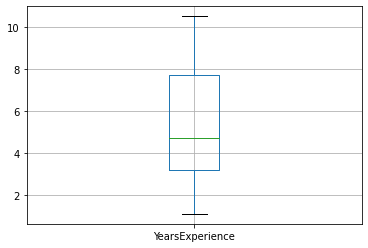

In [7]:
df.boxplot(column='YearsExperience')

<AxesSubplot:>

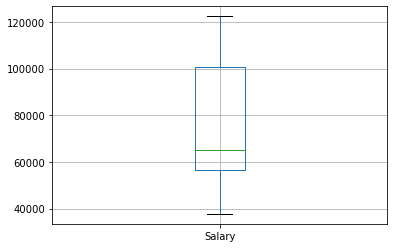

In [8]:
df.boxplot(column='Salary')

We can see that both features/variables show positive skew and that there are not outliers.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

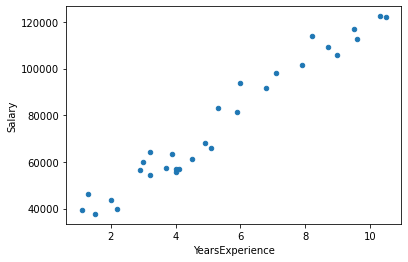

In [9]:
df.plot.scatter(x='YearsExperience', y='Salary')

Above is a scatter plot of years experience and salary data, make sure to always put the independent variable on the x-axis, i.e. Salary *depends* on Years Experience. We can see visually that there is a positive relationship between these two variables and so therefore this dataset would be a good candidate for applying Linear Regression.

Another way of quantifying this relationship is by obtaining the covariance, as one value goes up, how much do the other values follow, see this [link](https://en.wikipedia.org/wiki/Covariance). However first we need to normalise the dataset features (put them all in the range of 0-1) otherwise this value will be inaccurate. 

In [10]:
# could not find a built-in function to do this using pandas, 
# and not converting to numpy arrays (will lose columns names)
# found a solution at, reference: https://www.geeksforgeeks.org/data-normalization-with-pandas/

# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,YearsExperience,Salary
0,0.104762,0.321453
1,0.123810,0.377520
2,0.142857,0.308282
3,0.190476,0.355623
4,0.209524,0.325931
5,0.276190,0.462795
6,0.285714,0.491458
7,0.304762,0.444845
8,0.304762,0.526550
9,0.352381,0.467265


In [11]:
df_max_scaled.cov()

,YearsExperience,Salary
YearsExperience,0.073049,0.059222
Salary,0.059222,0.050172


We can see that we have a positive covariance between Years Experience and Salary (0.059), however this does not necessarily tell us the strength of the relationship, just the direction. A better way of actually quantifying the *strength* of this relationship is to use the Correlation Coefficient, or Pearson's *r*. This output a number that always lies between -1 and 1, and is much more interpretable than the covariance value, as the covariance value can take on practically any number.   

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000
